# Plant Seedlings Classification Project with TensorFlow 2.0

In this project, I'll work on Kaggle's Plant Seedling Classification dataset. This is a multi-class image classification project: We'd like to identify the species of a plant based on a given photograph of it. 

For the training data, we have 12 different plant species each stored in a different folder. The total number of images for training is 4750. 

We'll use TensorFlow 2.0 and Transfer Learning for this project.

https://www.kaggle.com/competitions/plant-seedlings-classification/overview/description

### Getting the data ready 

We have 12 seperate folders containing a different plant species. First, we'd like to create a Pandas dataframe so that contains the image id's together with the corresponding plant species.  

* ID - SPECIES = This is the dataframe structure we're looking for.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 
import tensorflow as tf

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path = '/content/drive/MyDrive/PlantSeedlings/train'
image_paths = []
species = []

for spec in os.listdir(data_path):
    spec_path = os.path.join(data_path, spec)
    for img in os.listdir(spec_path):
        img_path = os.path.join(spec_path, img)
        image_paths.append(img_path)
        species.append(spec)

In [ ]:
len(image_paths), len(species)

(4750, 4750)

In [ ]:
print(image_paths[:5])
print(species[:5])

['/content/drive/MyDrive/PlantSeedlings/train/Black-grass/0183fdf68.png', '/content/drive/MyDrive/PlantSeedlings/train/Black-grass/0050f38b3.png', '/content/drive/MyDrive/PlantSeedlings/train/Black-grass/075d004bc.png', '/content/drive/MyDrive/PlantSeedlings/train/Black-grass/05eedce4d.png', '/content/drive/MyDrive/PlantSeedlings/train/Black-grass/0260cffa8.png']
['Black-grass', 'Black-grass', 'Black-grass', 'Black-grass', 'Black-grass']


In [ ]:
df = pd.DataFrame({"image_path":image_paths,
                   "species":species})
df.head()

,image_path,species
0,/content/drive/MyDrive/PlantSeedlings/train/Bl...,Black-grass
1,/content/drive/MyDrive/PlantSeedlings/train/Bl...,Black-grass
2,/content/drive/MyDrive/PlantSeedlings/train/Bl...,Black-grass
3,/content/drive/MyDrive/PlantSeedlings/train/Bl...,Black-grass
4,/content/drive/MyDrive/PlantSeedlings/train/Bl...,Black-grass


In [ ]:
df.species.value_counts()

Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
Name: species, dtype: int64

In [ ]:
df.describe()

,image_path,species
count,4750,4750
unique,4750,12
top,/content/drive/MyDrive/PlantSeedlings/train/Bl...,Loose Silky-bent
freq,1,654


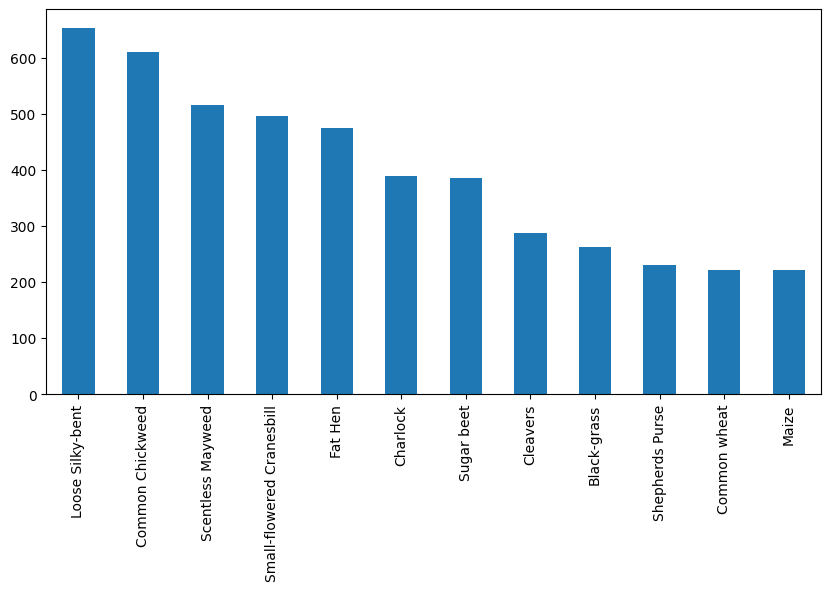

In [ ]:
df.species.value_counts().plot.bar(figsize=(10,5));

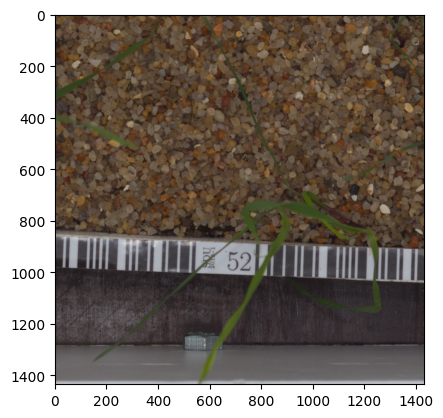

In [ ]:
img = plt.imread(df.image_path[100])
plt.imshow(img)
plt.show();

Now, we've a dataframe that consists of image filepaths with the corressponding labels. To progress further, we need to represent unique plant species with boolean values in the form of a numpy array.

In [ ]:
unique_species = np.unique(df['species'])
type(unique_species)

numpy.ndarray

In [ ]:
# This is an example of how we're trying to represent the species
df.species[0] == unique_species

array([ True, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# Let's turn every species's name into a boolean array
boolean_specs = [tf.equal(x, unique_species) for x in df['species']]
boolean_specs[:2]

[<tf.Tensor: shape=(12,), dtype=bool, numpy=
 array([ True, False, False, False, False, False, False, False, False,
        False, False, False])>,
 <tf.Tensor: shape=(12,), dtype=bool, numpy=
 array([ True, False, False, False, False, False, False, False, False,
        False, False, False])>]

In [ ]:
print(len(boolean_specs))

4750


### Creating our validation set

The first test place for our predictions must be our own validation dataset, not Kaggle's test folder.

**Problem:** We have a very orderly data frame. Since each different species are stored in a seperate folder, while looping over the folders, we ended up with a very orderly dataframe. It is healthy for our validation dataset.

First, we need to create a shuffled dataset and then re-create our boolean unique species list based on it. Only after this, we can split our data to training and validation sets.*italicized text*

In [ ]:
from sklearn.utils import shuffle

df_shuffled = shuffle(df)

In [ ]:
df_shuffled.shape, df.shape

((4750, 2), (4750, 2))

In [ ]:
df_shuffled.tail(5)

,image_path,species
1100,/content/drive/MyDrive/PlantSeedlings/train/Ch...,Charlock
1776,/content/drive/MyDrive/PlantSeedlings/train/Co...,Common wheat
4105,/content/drive/MyDrive/PlantSeedlings/train/Sm...,Small-flowered Cranesbill
2198,/content/drive/MyDrive/PlantSeedlings/train/Sc...,Scentless Mayweed
1633,/content/drive/MyDrive/PlantSeedlings/train/Cl...,Cleavers


In [ ]:
unique_species

array(['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed',
       'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize',
       'Scentless Mayweed', 'Shepherds Purse',
       'Small-flowered Cranesbill', 'Sugar beet'], dtype=object)

In [ ]:
# Recreating boolean_specs with the new shuffled dataframe
boolean_specs = [x == np.array(unique_species) for x in df_shuffled['species']]

In [ ]:
len(boolean_specs)

4750

In [ ]:
# Let's check if we got it right
print(df_shuffled.species.iloc[9])
index = boolean_specs[9].argmax()
print(unique_species[index])

Black-grass
Black-grass


Now, we got it right! We can progress and split our data into training and validation datasets.

In [ ]:
df_shuffled = df_shuffled.reset_index(drop=True)
df_shuffled.head()

,image_path,species
0,/content/drive/MyDrive/PlantSeedlings/train/Lo...,Loose Silky-bent
1,/content/drive/MyDrive/PlantSeedlings/train/Fa...,Fat Hen
2,/content/drive/MyDrive/PlantSeedlings/train/Co...,Common Chickweed
3,/content/drive/MyDrive/PlantSeedlings/train/Cl...,Cleavers
4,/content/drive/MyDrive/PlantSeedlings/train/Co...,Common Chickweed


In [ ]:
df_shuffled.image_path[0]

'/content/drive/MyDrive/PlantSeedlings/train/Loose Silky-bent/054ed75f8.png'

In [ ]:
X = df_shuffled.image_path
y = boolean_specs

In [ ]:
# First we'll experiment with a 1000 images
NUM_IMAGES = 1500 #@param {type:"slider", min:1000, max:4750, step:500}

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)
len(X_train), len(y_train), len(X_val), len(y_val)


(1200, 1200, 300, 300)

In [ ]:
X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)

### Preprocessing data
Our data is in the form of image_paths, boolean_labels. But to go further we need to create Tensors out of images that are located at the specified paths. By storing information in tensors, we can run deep learning algorithms on them by taking the advantage of GPU's.

First, we'll define a function:
1. Takes image path as an input.
2. Uses TensorFlow to read the path and save it to variable `image`.
3. Turns `image`(png file) into Tensors.
4. Resizes `image` to the shape of (224, 224).
5. Returns the modified image.

In [ ]:
import tensorflow as tf

In [ ]:
# This is the shape of our image 
from matplotlib.pyplot import imread
image = imread(df_shuffled.image_path[90])
image.shape

(360, 360, 3)

In [ ]:
# You can easily convert an image into tensors in this way:
# Interesting: The resulting tensors are the normalized (in range 0-1)
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 360, 3), dtype=float32, numpy=
array([[[0.27058825, 0.23529412, 0.20392157],
        [0.27058825, 0.23921569, 0.20392157],
        [0.27058825, 0.23921569, 0.19607843],
        ...,
        [0.27058825, 0.20784314, 0.14117648],
        [0.27450982, 0.20784314, 0.14901961],
        [0.2784314 , 0.20784314, 0.14901961]],

       [[0.27450982, 0.23921569, 0.21176471],
        [0.27058825, 0.23529412, 0.2       ],
        [0.27058825, 0.23921569, 0.19607843],
        ...,
        [0.27450982, 0.20784314, 0.14901961],
        [0.27450982, 0.20392157, 0.14509805],
        [0.27450982, 0.20392157, 0.14509805]]], dtype=float32)>

In [ ]:
# The function specified above
# First set the image size
IMG_SIZE = 224

def process_image(image_path):

    # Read the image path and save it to a variable
    image = tf.io.read_file(image_path)
    # Turn the image (png file) into a tensor with 3 color channels
    image = tf.image.decode_png(image, channels=3)
    # Convert the colour channels values from 0-255
    image = tf.image.convert_image_dtype(image, tf.float32)
    # Resize the image (224, 224)
    image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
    return image

### Creating Data Batches

Instead of training the deep learning algorithm over the entire dataset, we create data batches, small samples of data, so that the algorithm can work on a single sample at a time. This is a more GPU-friendly way of training the algorithm on the data. 

TensorFlow favors the structure of `image,label` when creating data batches. 

In [ ]:
# Create a function that returns a (image,label) tuple
def get_image_label(image_path, label):

    image = process_image(image_path)

    return image, label

The function above gets an image path and returns a tuple that consists of processed image and the label. Let's create another function that creates data batches from given datasets, and prepares data batches while taking into account whether we're dealing with training, validation or test data. 

In [ ]:
# Define the batch size
BATCH_SIZE = 32

def create_data_batches(x, y=None, batch_size=BATCH_SIZE, val_data=False, test_data=False):

    # We won't have labels if we have a test dataset, so only process image
    if test_data:
        print("Creating test data batches...")
        data = tf.data.Dataset.from_tensor_slices(tf.constant(x))
        data_batch = data.map(process_image).batch(batch_size)
    # We don't need to shuffle the dataset if we have a validation dataset
    elif val_data:
        print("Creating validation data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                                  tf.constant(y)))
        data_batch = data.map(get_image_label).batch(batch_size)
     # With training data, we'd like to shuffle it before training
    else:
        print("Creating training data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                                   tf.constant(y)))
        # Shuffle first before image processing
        data = data.shuffle(buffer_size=len(x))

        # Get image,label tuples
        data = data.map(get_image_label)
        # Get data batches
        data_batch = data.batch(batch_size)
    
    return data_batch
         

In [ ]:
# Create training and validation data batches 
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val,y_val)

Creating training data batches...
Creating training data batches...


In [ ]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 12), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 12), dtype=tf.bool, name=None)))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the transformations you want to apply
data_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generate augmented images from a directory of images
train_generator = data_generator.flow_from_directory(
    '/content/drive/MyDrive/PlantSeedlings/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)


Found 4750 images belonging to 13 classes.


Now, we've our data batches in the form of tensors with the correct form. Before moving to the training, let's visualize what is going on with the functions above to better understand what we're working on. 
### Visualizing data batches

In [ ]:
# Create a function for viewing images in the data batch

def show_10_images(images, labels):
    # Setup the figure
    plt.figure(figsize=(10, 10))

    for i in range(10):
        # Create subplots (5 rows, 5 columns)
        ax = plt.subplot(5, 5, i+1)
        # Display an image
        plt.imshow(images[i])
        # Add the image label as the title
        plt.title(unique_species[labels[i].argmax()])
        # Turn gird lines off
        plt.axis("off")

We batchified the datasets, but we can't visualize data bathces directly. First, we need to un-do it for visualizing.

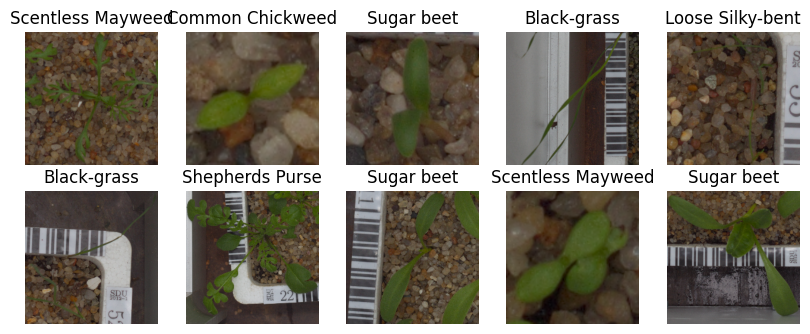

In [ ]:
train_images, train_labels = next(train_data.as_numpy_iterator())
show_10_images(train_images, train_labels)

This looks excellent! Each time you run the cell above you'll end up with a different code because create_data_batch function shuffles the data. 

Let's visualize the validation set.

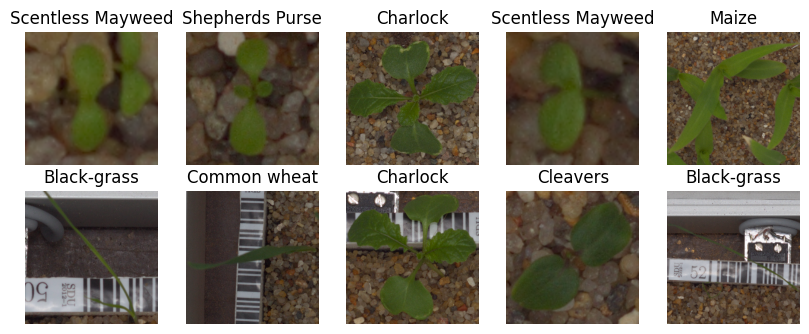

In [ ]:
val_images, val_labels = next(val_data.as_numpy_iterator())
show_10_images(val_images, val_labels)

### Data augmentation for a better performance

### Creating and training a model

Since we have our data ready for deep learning algoritms to train, let's build a deep learning model. We'll use a pre-trained model for this task. This called "transfer learning". There are pre-trained deep learning you can find on TensorFlow website. 

### Building a model
Things that we need to define:
* The input shape.(Images in the form of Tensors)
* The output shape. (image labels, in the form of Tensors)
* The URL of the model we want to use.

### Building our own evaluation metric

The evaluation metric for our dataset is micro-averaged f1 score. It is not a built-in evaluation metric and we need to create it first. 

In [ ]:
# The evaluation metric we'll use
import tensorflow as tf

def f1_micro(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.round(tf.clip_by_value(y_pred, 0, 1))

    tp = tf.reduce_sum(y_true * y_pred)
    fp = tf.reduce_sum((1 - y_true) * y_pred)
    fn = tf.reduce_sum(y_true * (1 - y_pred))

    precision = tp / (tp + fp + tf.keras.backend.epsilon())
    recall = tp / (tp + fn + tf.keras.backend.epsilon())

    f_score = 2 * precision * recall / (precision + recall + tf.keras.backend.epsilon())

    return f_score


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
# Setup the input shape 
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]

# Setup the output shape
OUTPUT_SHAPE = (len(unique_species))

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"


In [ ]:
# Create a function that builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
    print(f"Building a model with {MODEL_URL}...")

    # Setup model layers
    model = tf.keras.Sequential([
        hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
        tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                              activation="softmax") # The output layer
    ])
    # Compile the model
    model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(), # For improvement
        metrics=["accuracy", f1_micro])
    # Build the model
    model.build(INPUT_SHAPE) # Let the model know the output it'll be getting

    return model

In [ ]:
model = create_model()
model.summary()

Building a model with https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 12)                12024     
                                                                 
Total params: 5,444,737
Trainable params: 12,024
Non-trainable params: 5,432,713
_________________________________________________________________


### TensorBoard Callback

The callbacks are necessary to keep track of the model's progress. They have two functions: To imform us the time model started training and to halt model's training if it stop improving its performance over defined consecutive trials. 

To create the callback and view it in TensorBoard notebook we need to three things:
1. Load the TensorBoard notebook extension. 
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's `fit()` function. 
3. Visualize our model's training logs using `%tensorboard` magic function.

In [ ]:
# Load the TensorBoard notebook extension 
%load_ext tensorboard

In [ ]:
import datetime

# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
    # Create a log directory for storing TensorBoard logs
    logdir = os.path.join("/content/drive/MyDrive/PlantSeedlings/logs",
                          # Make it so the logs get tracked whenever we run an experiment
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    return tf.keras.callbacks.TensorBoard(logdir)

In [ ]:
# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_f1_micro',
                                                  patience=5)

### Training the model on subset of data

As a final move, we need to define number of epochs. Epochs refer to a training where the model trains over the entire dataset. By increasing it, our model will have many exposures to the data. 

In [ ]:
# Check if GPU is available
print("GPU", "available!" if tf.config.list_physical_devices("GPU") else "not available.")

GPU available!


In [ ]:
# Define epochs 
NUM_EPOCHS = 100 

In [ ]:
history = model.fit_generator(
    train_generator,
    epochs=10,
    validation_data=val_data,
    callbacks=[create_tensorboard_callback, early_stopping]
)


Let's create a function for training the model. The function will do the following:
* Create a model using `create_model()`
* Setup a TensorBoard callback using `create_tensorboard_callback()`
* Call the `fit()` function on our model to pass it over the training and validation data, determine the number of epochs and setting up the callbacks we previously created. 
* Return the fitted model.

In [ ]:
# Build a function to train and return a trained model
def train_model():

    # Create the model
    model = create_model()

    # Create new TensorBoard session everytime we train a model
    tensorboard = create_tensorboard_callback()



    # Fit the model to the data and passing it callbacks we created
    model.fit(x=train_data,
              epochs=NUM_EPOCHS,
              validation_data=val_data,
              validation_freq=1,  # Checks validation metrics every epoch
              callbacks=[tensorboard, early_stopping])
    return model


In [ ]:
model = train_model()

Building a model with https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5...
Epoch 1/100
38/38 [==============================] - 326s 9s/step - loss: 2.2729 - accuracy: 0.3142 - f1_micro: 0.2099 - val_loss: 1.5877 - val_accuracy: 0.4600 - val_f1_micro: 0.3808
Epoch 2/100
38/38 [==============================] - 18s 464ms/step - loss: 1.2337 - accuracy: 0.5767 - f1_micro: 0.4969 - val_loss: 1.1795 - val_accuracy: 0.6300 - val_f1_micro: 0.5740
Epoch 3/100
38/38 [==============================] - 15s 393ms/step - loss: 0.9195 - accuracy: 0.6842 - f1_micro: 0.6329 - val_loss: 1.0137 - val_accuracy: 0.6800 - val_f1_micro: 0.6468
Epoch 4/100
38/38 [==============================] - 15s 400ms/step - loss: 0.7646 - accuracy: 0.7525 - f1_micro: 0.7174 - val_loss: 0.9299 - val_accuracy: 0.6933 - val_f1_micro: 0.6815
Epoch 5/100
38/38 [==============================] - 15s 396ms/step - loss: 0.6590 - accuracy: 0.7933 - f1_micro: 0.7650 - val_loss: 0.8911 - val_accuracy: 0.700

In [ ]:
model.evaluate(val_data)

10/10 [==============================] - 3s 293ms/step - loss: 0.8584 - accuracy: 0.7233 - f1_micro: 0.7121


[0.858376681804657, 0.7233333587646484, 0.7121307253837585]

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=30,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/PlantSeedlings/train',
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical')
history = model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=50,
        validation_data=val_generator,
        validation_steps=len(val_generator))



Found 4750 images belonging to 13 classes.


NameError: ignored

### Making and evaluating predictions with the trained model

In [ ]:
# Make predictions on the validation data (not used to train on)
predictions = model.predict(val_data, verbose=1) # verbose shows us how long there is to go
predictions

13/13 [==============================] - 18s 238ms/step


array([[1.0240275e-02, 1.0673867e-03, 2.4397264e-05, ..., 1.4122626e-05,
        3.7015927e-06, 1.2477227e-02],
       [1.8315701e-04, 3.0518675e-04, 1.8478439e-03, ..., 3.2824250e-05,
        2.3898238e-07, 9.5634818e-01],
       [1.2686829e-01, 1.2506778e-02, 1.3591982e-04, ..., 3.9221687e-04,
        2.8401984e-02, 8.4255990e-03],
       ...,
       [4.3592593e-03, 1.6412282e-06, 2.0157655e-04, ..., 7.8287168e-04,
        8.9757181e-05, 6.5645283e-05],
       [5.3258538e-02, 1.4768671e-03, 2.1299049e-02, ..., 5.6529567e-02,
        7.3088795e-02, 6.7817658e-04],
       [1.5883647e-03, 3.8534679e-02, 1.8272623e-03, ..., 5.9788505e-05,
        6.1576837e-05, 9.4800904e-02]], dtype=float32)

In [ ]:
# Check the shape of predictions
predictions.shape

(400, 12)

In [ ]:
# First prediction
print(predictions[0])
print(f"Max value (probability of prediction): {np.max(predictions[0])}")
print(f"Sum: {np.sum(predictions[0])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(predictions[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {unique_species[np.argmax(predictions[0])]}") # the predicted label

[1.0240275e-02 1.0673867e-03 2.4397264e-05 2.0086563e-05 9.3375456e-01
 4.1607890e-02 2.3587888e-04 4.2854139e-04 1.2601868e-04 1.4122626e-05
 3.7015927e-06 1.2477227e-02]
Max value (probability of prediction): 0.933754563331604
Sum: 1.0000001192092896
Max index: 4
Predicted label: Common wheat


In [ ]:
# Let's write a function to turn prediction probabilities into their respected label
def get_pred_label(pred_probs):
    return unique_species[np.argmax(pred_probs)]

In [ ]:
pred_label = get_pred_label(predictions[0])
pred_label

'Common wheat'

Since the model still hasn't trained on the validation data, we can make prediction on the validation data and compare them to actual labels and visually plot them.

However, our validation data is in the form of (images,labels) and in batches of 32. First, we need to unbatch it.

In [ ]:
def unbatchify(data):
    images = []
    labels = []

    # Loop through the unbatched data
    for image, label in data.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(unique_species[np.argmax(label)])
    return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.3529412 , 0.28235295, 0.21176472],
         [0.35046396, 0.27987573, 0.21176472],
         [0.3459909 , 0.27691704, 0.20722166],
         ...,
         [0.4551732 , 0.4159575 , 0.3924281 ],
         [0.46996674, 0.435084  , 0.41155457],
         [0.48235297, 0.454902  , 0.43137258]],
 
        [[0.33807775, 0.25758055, 0.18203783],
         [0.33560053, 0.25510332, 0.1789081 ],
         [0.3320841 , 0.25214463, 0.1744535 ],
         ...,
         [0.42927283, 0.37767094, 0.35414153],
         [0.44115222, 0.39388326, 0.37126622],
         [0.45510334, 0.41526613, 0.39421394]],
 
        [[0.3354692 , 0.24465163, 0.16470589],
         [0.33203536, 0.24121776, 0.1597514 ],
         [0.32851893, 0.23828612, 0.15593317],
         ...,
         [0.41289762, 0.35104534, 0.32634634],
         [0.41853482, 0.36045778, 0.33781493],
         [0.42861524, 0.37701333, 0.3558911 ]],
 
        ...,
 
        [[0.3254902 , 0.2509804 , 0.20000002],
         [0.33083734, 0.2538503 , 0.20630

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth label and image for sample n.
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  
  # Get the pred label
  pred_label = get_pred_label(pred_prob)
  
  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

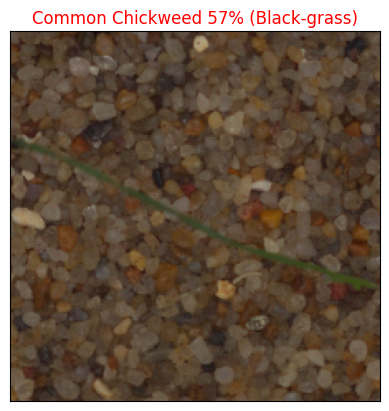

In [ ]:
# View an example prediction, original image and truth label
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=156)

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_species[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                     top_10_pred_values, 
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

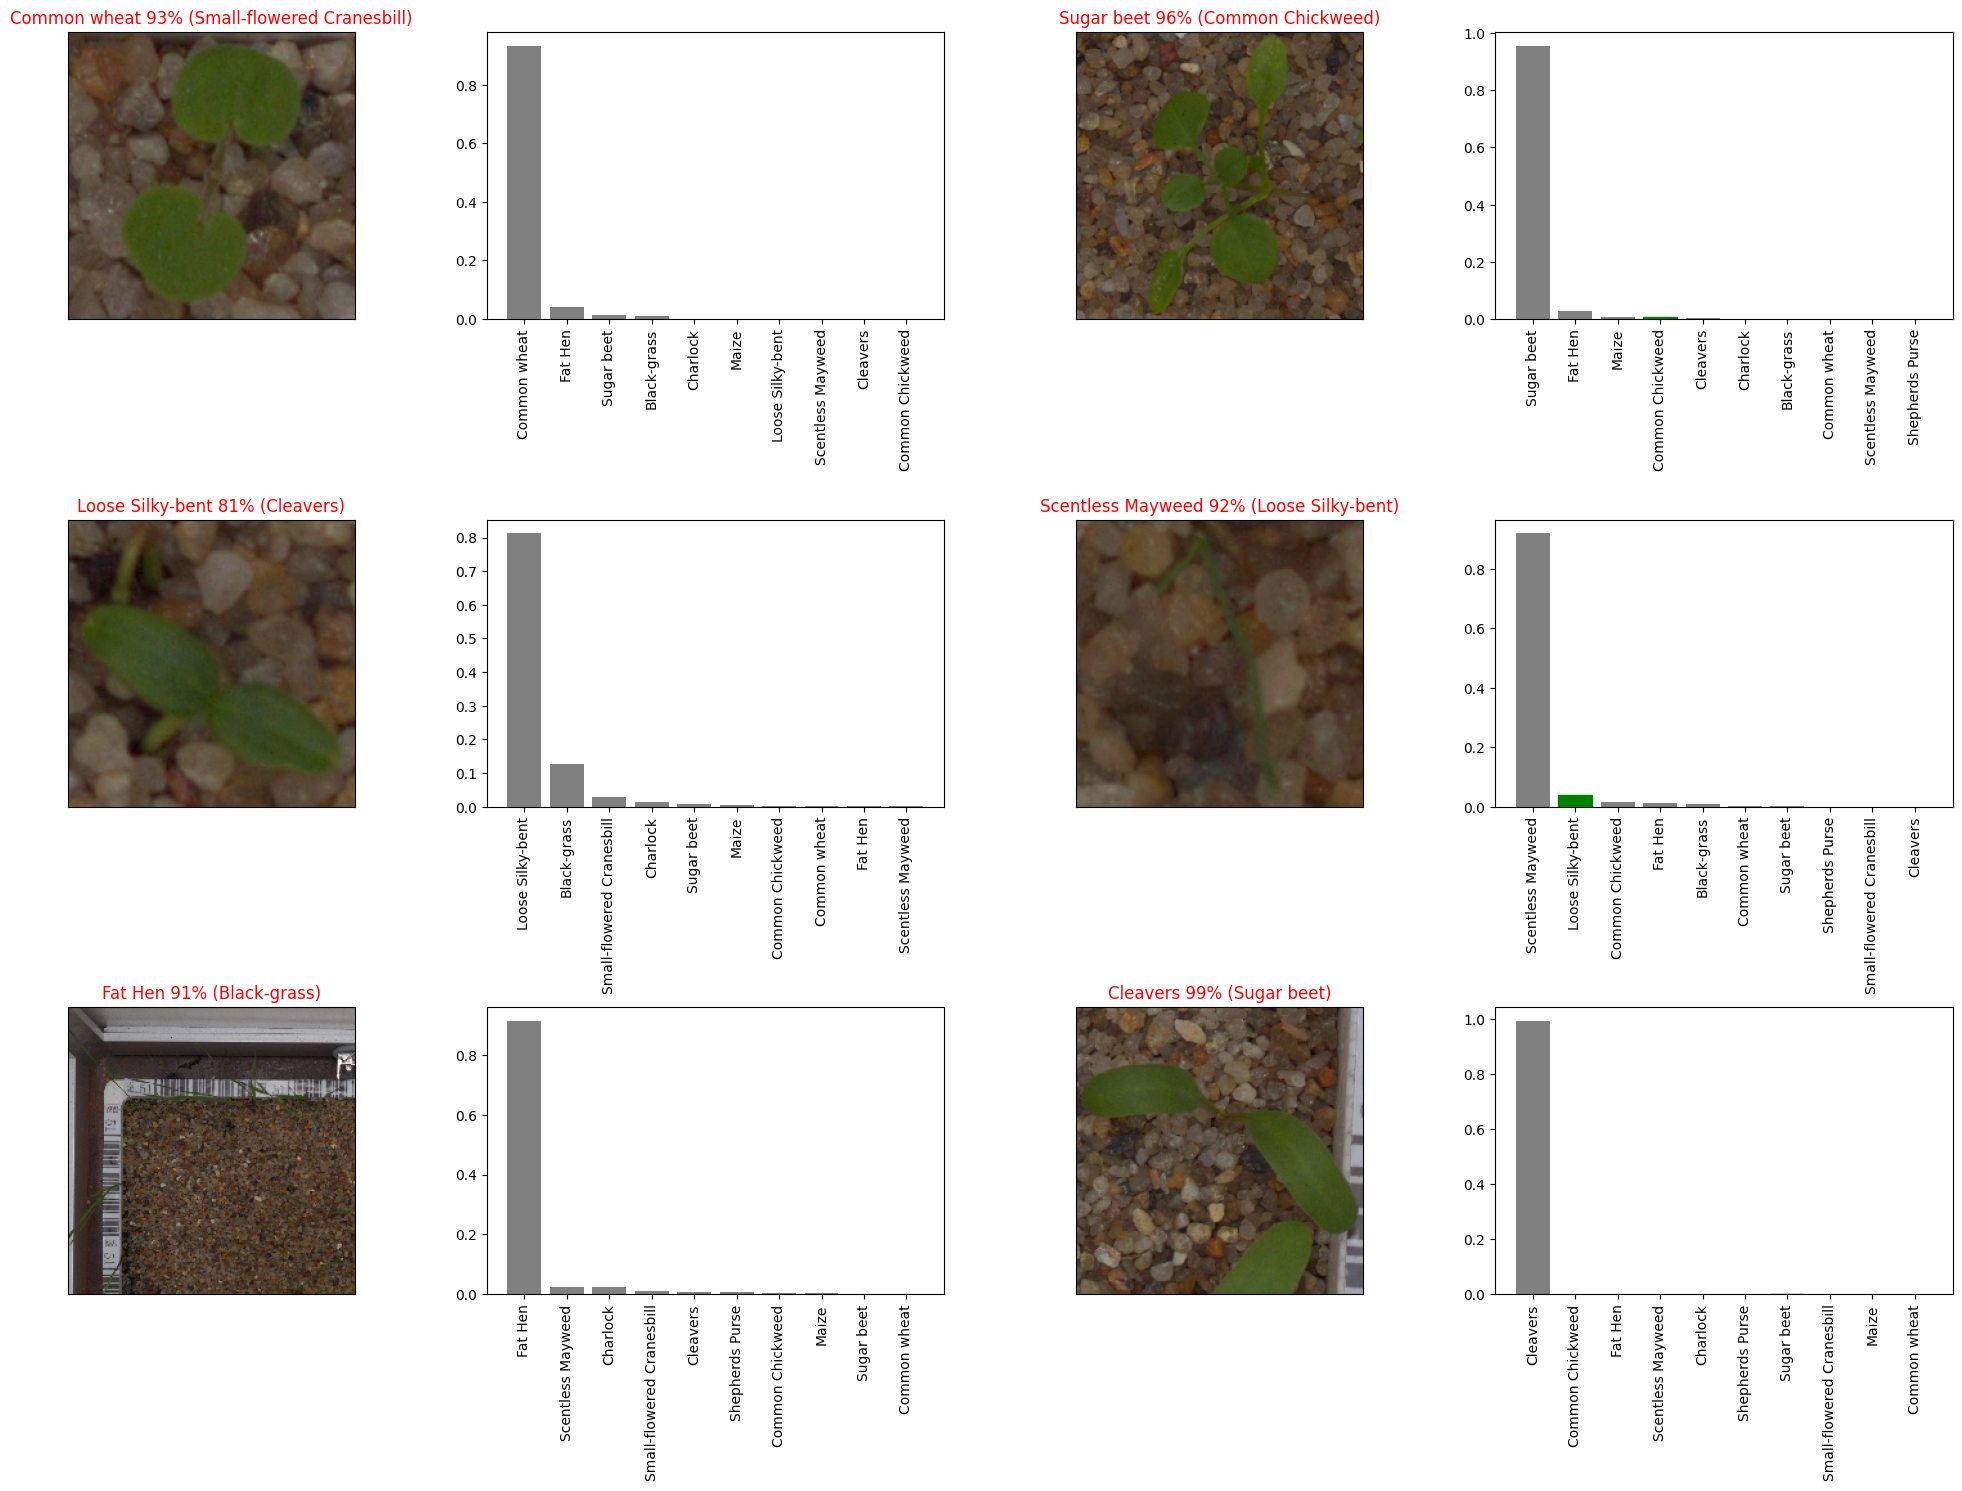

In [ ]:
# Let's check a few predictions and their different values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

In [ ]:
# Evaluate the pre-saved model
model.evaluate(val_data)

13/13 [==============================] - 3s 236ms/step - loss: 0.7222 - accuracy: 0.7750 - f1_micro: 0.7628


[0.7221582531929016, 0.7749999761581421, 0.7628068327903748]